# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') # Look Pretty

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [4]:
df1 = pd.read_csv('./Datasets/Crimes_-_2001_to_present.csv')

Get rid of any _rows_ that have nans in them:

In [5]:
df1.dropna(axis = 0, how = 'any', inplace = True)

Display the `dtypes` of your dset:

In [9]:
print (df1.dtypes)

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [8]:
df1.Date = pd.to_datetime(df1.Date) # Converts the entries in the 'Date' column to datetime64[ns]

In [33]:
def doKMeans(dataframe):

  #
  # TODO: Filter dataframe so that you're only looking at Longitude and Latitude,
  # since the remaining columns aren't really applicable for this purpose.
  #
  # .. your code here ..
  df = pd.concat([dataframe.Longitude, dataframe.Latitude], axis = 1)

  #
  # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Latitude and Longitude locations in your dataset.
  # Longitude = x, Latitude = y!
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(x = df.Longitude, y = df.Latitude, marker='.', alpha=0.3, s = 30)

  #
  # TODO: Use K-Means to try and find seven cluster centers in this dataframe.
  #
  # .. your code here ..
  kmeans_model = KMeans(n_clusters = 7, init = 'random', n_init = 60, max_iter = 360, random_state = 43)
  labels = kmeans_model.fit_predict(df)

  #
  # INFO: Print and plot the centroids...
  centroids = kmeans_model.cluster_centers_
  ax.scatter(x = centroids[:,0], y = centroids[:,1], marker='x', c='red', alpha=0.7, linewidths=3, s = 120)
  print (centroids)
  
  ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='blue', alpha=0.5, linewidths=3, s=169)

In [34]:
# Print & Plot your data
doKMeans(df1)

[[-87.63119446  41.69666143]
 [-87.684885    41.98183762]
 [-87.70953278  41.87812908]
 [-87.75689915  41.89346097]
 [-87.66467762  41.77285751]
 [-87.58267443  41.75271087]
 [-87.61953026  41.80357078]]


Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

[[-87.66417811  41.77634796]
 [-87.75473878  41.89010771]
 [-87.58026093  41.75069923]
 [-87.71044143  41.87504838]
 [-87.63505496  41.70537571]
 [-87.68522419  41.98536496]
 [-87.61788511  41.79220178]]


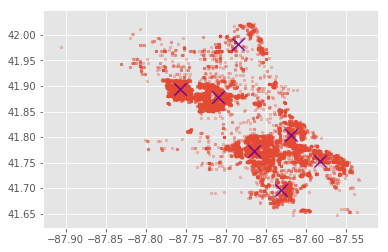

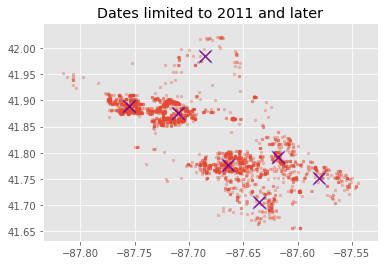

In [35]:
df2 = df1[df1.Date > '2011-01-01']

# INFO: Print & Plot your data
doKMeans(df2)
plt.title("Dates limited to 2011 and later")
plt.show()

[[-87.63119446  41.69666143]
 [-87.684885    41.98183762]
 [-87.70953278  41.87812908]
 [-87.75689915  41.89346097]
 [-87.66467762  41.77285751]
 [-87.58267443  41.75271087]
 [-87.61953026  41.80357078]]


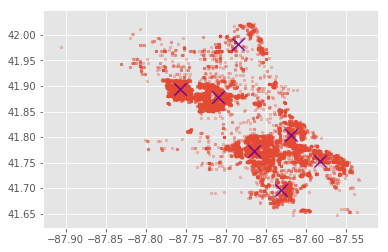

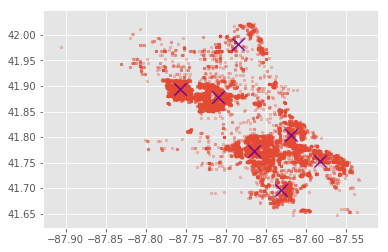

In [38]:
# Print & Plot your data
doKMeans(df1)
plt.show()

In [28]:
dfc

,Longitude,Latitude
0,-87.561511,41.758607
1,-87.721389,41.889909
2,-87.751710,41.894005
3,-87.767149,41.882208
4,-87.662629,41.763106
5,-87.756382,41.882983
6,-87.633305,41.851434
7,-87.754869,41.961084
8,-87.721580,41.739137
9,-87.752177,41.975280
